# <a id='0'>EDA POKÉMON</h1>
![Pokémon](../utils/img/img12.jpg)

- ##  <a href='#1'>1. Analisis Exploratio de Datos (EDA)</a>
    <b></b>
    - ##  <a href='#11'>1.1. Hipotesis</a>
    - ##  <a href='#12'>1.2. Librerias</a>
    - ##  <a href='#13'>1.3. Obtener Datos</a>
<b></b>
- ##  <a href='#2'>2. Conclusiones</a>

### Si necesita contactarme:
* Email: ***jamr1989@gmail.com***
* Linkedin: ***https://www.linkedin.com/in/JuanManiglia***

#### Check mis repos en Github: ***https://github.com/JuanManiglia***
#### Lee mis artículos en Medium: ***https://medium.com/@juanmaniglia1989***

# <a id='1'>1. Analisis Exploratio de Datos (EDA)</a>

##  <a id='11'>1.1. Hipotesis</a>

Lo primero que tendríamos que hacer es plantearnos las hipótesis.

- Cuál es el Pokémon más poderoso que existe
- Qué generación tiene los Pokémon más poderosos
- Cuál es tipo de más común
- Cuál es el Pokémon más grande y el más pequeño, el tipo tendría relación con el tamaño?

##  <a id='12'>1.2. Librerias</a>

In [2]:
import os
import sys
import requests
import json
os.chdir(os.path.dirname(sys.path[0])) # Este comando hace que el notebook sea la ruta principal y poder trabajar en cascada
from utils.funciones import Api
from utils.libreria import *
from pandas_profiling import ProfileReport

##  <a id='13'>1.3. Obtener Datos</a>

Vamos a utilizar la [API](https://pokeapi.co/docs/v2#pokemon) de Pokémon para obtener los datos que vamos a utilizar

En la api según la documentación debemos utilizar la url **pokeapi.co/api/v2/pokemon/?limit=number** para obtener todos los Pokémons, y aqui es donde empieza el trabajo del analista de datos, debemos aplicar los conocimientos de negocios o si un tema nuevo investigar, en este caso debemos averiguar [cuantos pokemons](https://noticiast.com/cuantos-pokemon-hay-en-total-en-2021/#:~:text=Actualmente%20hay%20898%20Pok%C3%A9mon%20a,aumentando%20como%20lo%20ha%20hecho)

In [3]:
lista_pokemon = list()

for i in range(1,899): # recordando que el range va desde el el a hasta el b-1, entonces se coloca hasta el ultimo +1

    url = f"https://pokeapi.co/api/v2/pokemon/{i}"
    res = requests.get(url)
    data=res.json()

    id = data['id']
    altura = data['height']
    nombre = data['name']
    generacion = Api.generacion_(i)
    peso = data['weight']
    tipo1 = data['types'][0]['type']['name']
    try:
        tipo2 = data['types'][1]['type']['name']
    except:
        tipo2 = None
    hp = data['stats'][0]['base_stat']
    attack = data['stats'][1]['base_stat']
    defense = data['stats'][2]['base_stat']
    special_attack = data['stats'][3]['base_stat']
    special_defense = data['stats'][4]['base_stat']
    speed = data['stats'][5]['base_stat']
    
    my_dict = {'id': id,
            'nombre': nombre,
            'generacion': generacion,
            'peso':peso,
            'altura':altura,
            'tipo1':tipo1,
            'tipo2':tipo2,
            'hp':hp,
            'attack':attack,
            'defense':defense,
            'speed':speed,
            's_attack':special_attack,
            's_defense':special_defense }

    lista_pokemon.append(my_dict)

In [4]:
pokemon = pd.DataFrame(lista_pokemon)
pokemon.set_index('id',inplace=True)
pokemon.head()

,nombre,generacion,peso,altura,tipo1,tipo2,hp,attack,defense,speed,s_attack,s_defense
id,,,,,,,,,,,,
1,bulbasaur,1,69,7,grass,poison,45,49,49,45,65,65
2,ivysaur,1,130,10,grass,poison,60,62,63,60,80,80
3,venusaur,1,1000,20,grass,poison,80,82,83,80,100,100
4,charmander,1,85,6,fire,None,39,52,43,65,60,50
5,charmeleon,1,190,11,fire,None,58,64,58,80,80,65


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 1 to 898
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nombre      898 non-null    object
 1   generacion  898 non-null    int64 
 2   peso        898 non-null    int64 
 3   altura      898 non-null    int64 
 4   tipo1       898 non-null    object
 5   tipo2       442 non-null    object
 6   hp          898 non-null    int64 
 7   attack      898 non-null    int64 
 8   defense     898 non-null    int64 
 9   speed       898 non-null    int64 
 10  s_attack    898 non-null    int64 
 11  s_defense   898 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 91.2+ KB


In [6]:
pokemon.describe()

,generacion,peso,altura,hp,attack,defense,speed,s_attack,s_defense
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,4.146993,639.700445,11.859688,69.031180,76.544543,71.886414,65.949889,69.681514,69.876392
std,2.248398,1194.302978,12.342218,26.213707,29.665559,29.536184,28.456596,29.372609,27.012142
min,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,2.000000,85.000000,5.000000,50.000000,55.000000,50.000000,45.000000,46.250000,50.000000
50%,4.000000,270.000000,10.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,6.000000,650.000000,15.000000,80.000000,95.000000,90.000000,85.000000,90.000000,85.000000
max,8.000000,9999.000000,200.000000,255.000000,181.000000,230.000000,200.000000,173.000000,230.000000


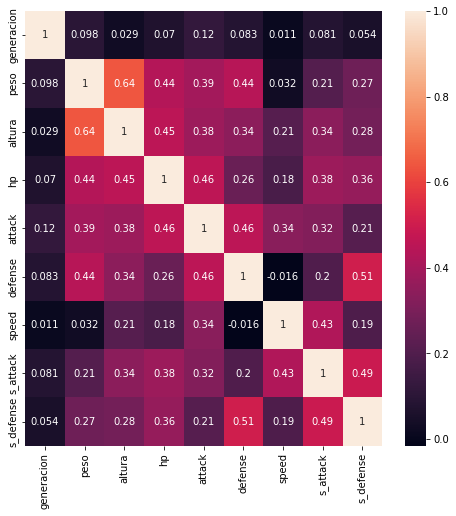

In [7]:
plt.figure(figsize=(8,8));
sns.heatmap(pokemon.corr(),annot=True);

In [15]:
profile = ProfileReport(pokemon, title="Pandas Profiling Report", explorative=True)
profile.to_file("utils/reports/pokemon_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\jamr1\miniconda3\envs\eda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


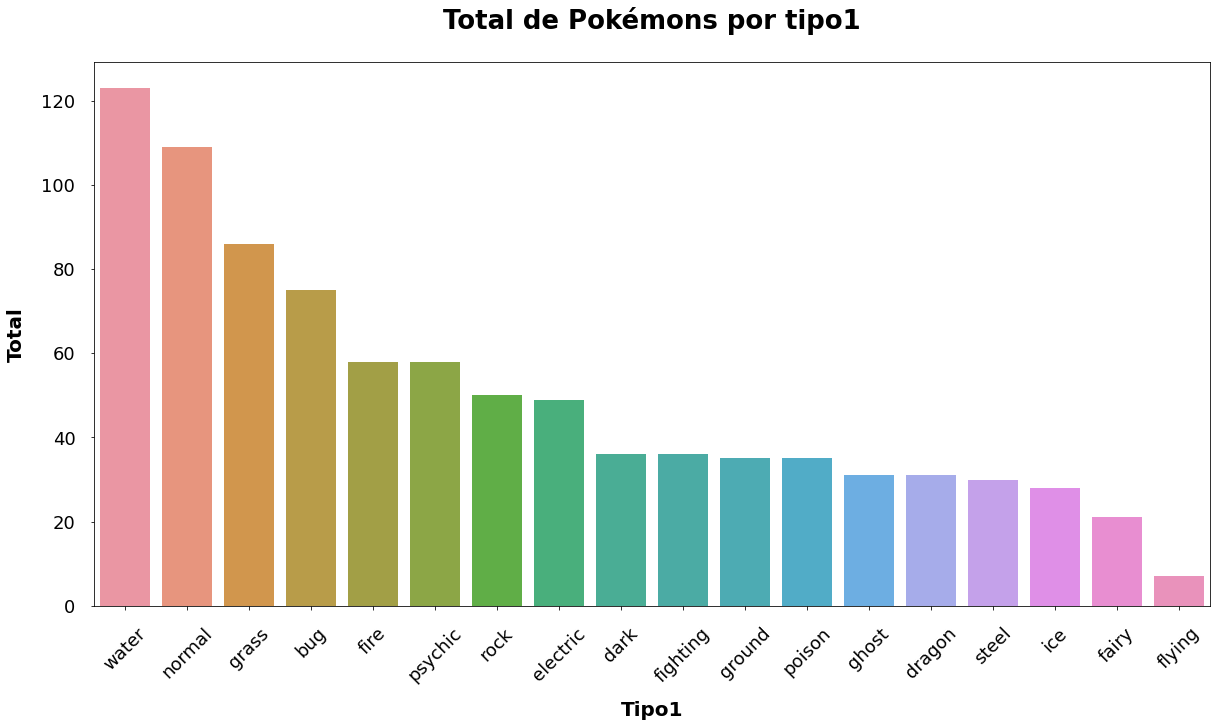

In [9]:
df = pokemon['tipo1'].value_counts();

fig, ax = plt.subplots(1,1,figsize=(20,10));


sns.barplot(df.index, df.values, ax=ax);

ax.tick_params(labelsize=18, direction='out', pad=15);
ax.set_xlabel('Tipo1', weight='bold', size='20', labelpad=15,);
ax.set_ylabel('Total', weight='bold', size='20', labelpad=15);
ax.set_title('Total de Pokémons por tipo1',  size='26', weight='bold', y=1.05);
plt.xticks(rotation=45);

In [10]:
pokemon[pokemon['attack'] == pokemon['attack'].max()]

,nombre,generacion,peso,altura,tipo1,tipo2,hp,attack,defense,speed,s_attack,s_defense
id,,,,,,,,,,,,
798,kartana,7,1,3,grass,steel,59,181,131,109,59,31


In [11]:
pokemon.to_pickle('../data/processed/pokemon.pkl')

# <a id='2'>2. Conclusiones</a>

Podemos observar que al utilizar la API nos evitamos tener un dataset `"sucio"`, porque nosotros extraemos los datos que queremos y completamos los faltantes con el valor que queremos.

Pôdemos concluir con los datos obtenidos:

- Existen 898 Pokémon.
- Peso máximo 200
- Altura máxima 9999
- El mapa de calor no nos muestra correlaciones altas
- Con una simple gráfica podemos ver que el tipo agua es el más repetido, pero será para todas las generaciones?
- Él Pokémon más poderoso es katarna??